# Unity-ML Reacher Environment Single Agent Testing

---

In this notebook, we will test our pre-trained agent in Reacher environment.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
from ddpg_agent import DDPGAgent
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Fetch the State and Action Spaces

For testing the agent we need action and state spaces.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])


Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 4. Configure test

In [5]:
totalScores = []
totalEpisodeNumber = 100
epsilon = 0
epsilonDecay = 0.999
minEpsilon = 0.01

### 3. Load Pre-Trained Agent

We have to load actor and critic networks for our agent. First, we should create an 'DDPGAgent' object. Then, we should load our network parameters for both actor and critic.

In [6]:
agent = DDPGAgent(state_size, action_size, 0, epsilon, epsilonDecay, minEpsilon)
# load the weights from file
agent.actor_local.load_state_dict(torch.load('reacher_actor_singleAgent.pth'))
agent.critic_local.load_state_dict(torch.load('reacher_critic_singleAgent.pth'))

In [7]:
for i_episode in range(1, totalEpisodeNumber+1):
        env_info = env.reset(train_mode=False)[brain_name]     # reset the environment
        state = env_info.vector_observations[0] # since it is just for single agent, take the first element of state array
        agent.reset()
        score = 0
        while(True): # We wait until the epsiode has been completed
            action = agent.act(state)
            env_info = env.step(action)[brain_name]           # send all actions to tne environment
            next_state = env_info.vector_observations[0]         # get next state (for only first agent)
            reward = env_info.rewards[0]                         # get reward (for only first agent)
            done = env_info.local_done[0]
            state = next_state
            score += reward
            if done:
                break
        totalScores.append(score)
print('Average score (averaged over agents) from all episodes: {}'.format(np.mean(totalScores)))

Average score (averaged over agents) from all episodes: 34.37529923165217


### 5.Plot the scores

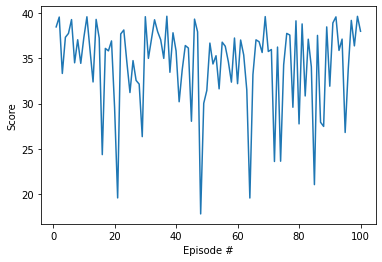

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(totalScores)+1), totalScores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 6. Close the Unity Environment

In [9]:
env.close()

